# RCWG Azure usage report for a financial year
### Author: Tomas Lazauskas
#### Updated: 2019-11-06

In [1]:
import sys
import os
import pandas as pd

from dateutil.relativedelta import relativedelta

sys.path.append("../..")

from azure_usage.src_notebook.analysis import EA_budget, analyse_spnsr_usage, analyse_ea_usage, get_detailed_spnsr_analysis_df
from azure_usage.src_notebook.graphs import plot_year_month_bar_stacked_ext

pd.options.display.float_format = '${:,.2f}'.format

# Importing data

## Sponsorship and EduHub usage data
`spnsr_data_path` should point to a directory which contains **ALL** available usage data from both systems

In [2]:
spnsr_data_path = os.path.join(os.path.expanduser("~"), "The Alan Turing Institute/Azure Usage dump - Documents")

## Data filters and parameters
The sponsoship/EduHub budget is based on use-it-or-loose principle, thus we are analysing only a single financial year at the time.

**Y1**: 2016-10-10 - 2017-10-09 <br>
**Y2**: 2017-10-10 - 2018-10-09 <br>
**Y3**: 2018-10-10 - 2019-09-30 <br>
**Y4**: 2019-10-01 - 2020-09-30 <br>
**Y5**: 2020-10-01 - 2021-09-30 <br>

In [3]:
# Sponsorship budget for the financial year
spnsr_budget = 980000

# Financial year starts from (inclusive)
analysis_from = pd.to_datetime("2019-10-01")

# Financial year until (exclusive)
analysis_to = pd.to_datetime("2020-09-30")

# Detailed analysis from (inclusive)
detailed_analysis_from = pd.to_datetime("2019-10-01")

### Sponsorship and EduHub usage data analysis

In [4]:
spnsr_remain, spnsr_usage, spnsr_df, max_reg_cost_day = analyse_spnsr_usage(spnsr_data_path, 
    analysis_from, analysis_to, spnsr_budget)

## EA usage data
At the moment EA accounts are not utilisied. 
**TODO**: This needs to be implemented when we will start using EA accounts.

In [5]:
ea_data_path = ""
ea_data_df = None

## Usage of the _EA_ account

**TODO**: at the moment EA accounts usage is 0, therefore ea_usage_ym_df = None. Later on we need to extarct data for ea_usage_ym_df

## EA Budgets

In [6]:
budgets = []

### ASG aka SPFA 
budgets.append(
    EA_budget(
        "ASG (aka SPFA)", 
        pd.to_datetime("2019-01-01"),
        pd.to_datetime("2020-03-31"),
        321897.25, # 250000 GBP
        "USD"))

### LWM
budgets.append(
    EA_budget(
        "LwM", 
        pd.to_datetime("2019-04-01"),
        pd.to_datetime("2024-03-31"),
        321897.25, # 250000 GBP
        "USD"))

In [7]:
ea_budget, ae_usage, ea_remain, ea_df = analyse_ea_usage(budgets, ea_data_df, analysis_from, analysis_to, max_reg_cost_day)

In [8]:
# Budget
main_text = "Total allocation for cloud expenditure for the period {} - {}: ${:,.0f}\n".format(analysis_from.strftime("%d/%m/%Y"), 
                                                                                (analysis_to + relativedelta(days=-1)).strftime("%d/%m/%Y"), 
                                                                                int(round(spnsr_budget + ea_budget, -3)))
main_text += "- Microsoft Azure Y4 sponsorship donation: ${:,.0f}.\n".format(int(round(spnsr_budget, -3)))
main_text += "- Microsoft Azure EA funds: ${:,.0f}.\n".format(int(round(ea_budget, -3)))

# Total usage
main_text += "\n"
main_text += "Total Microsoft Azure usage for the period {} - {}: ${:,.0f}\n".format(analysis_from.strftime("%d/%m/%Y"), 
                                                            max_reg_cost_day.strftime("%d/%m/%Y"),
                                                            int(round(spnsr_usage + ae_usage, -3)))

main_text += "- Sponsorship donation usage: ${:,.0f}\n".format(int(round(spnsr_usage, -3)))
main_text += "- EA funds usage: ${:,.0f}\n".format(int(round(ae_usage, -3)))

main_text += "\n"
main_text += "Remaining Microsoft Azure budget for the period {} - {}: ${:,.0f}\n".format((max_reg_cost_day + relativedelta(days=1)).strftime("%d/%m/%Y"),
                                                                  (analysis_to + relativedelta(days=-1)).strftime("%d/%m/%Y"),
                                                                  int(round(spnsr_remain + ea_remain, -3)))
main_text += "- Remaining sponsorship donation: ${:,.0f}\n".format(int(round(spnsr_remain, -3)))
main_text += "- Remaining EA funds: ${:,.0f}\n".format(int(round(ea_remain, -3)))

detailed_text = "Detailed analysis of Microsoft Azure sponsorship usage for the period {} - {}:".format(analysis_from.strftime("%d/%m/%Y"), 
                                                                                max_reg_cost_day.strftime("%d/%m/%Y"))

detailed2_text = "Detailed analysis of Microsoft Azure sponsorship usage for the period {} - {}:".format(analysis_from.strftime("%d/%m/%Y"), 
                                                                                max_reg_cost_day.strftime("%d/%m/%Y"))


# Report

In [9]:
print(main_text)

Total allocation for cloud expenditure for the period 01/10/2019 - 29/09/2020: $1,359,000
- Microsoft Azure Y4 sponsorship donation: $980,000.
- Microsoft Azure EA funds: $379,000.

Total Microsoft Azure usage for the period 01/10/2019 - 09/01/2020: $132,000
- Sponsorship donation usage: $132,000
- EA funds usage: $0

Remaining Microsoft Azure budget for the period 10/01/2020 - 29/09/2020: $1,227,000
- Remaining sponsorship donation: $848,000
- Remaining EA funds: $379,000



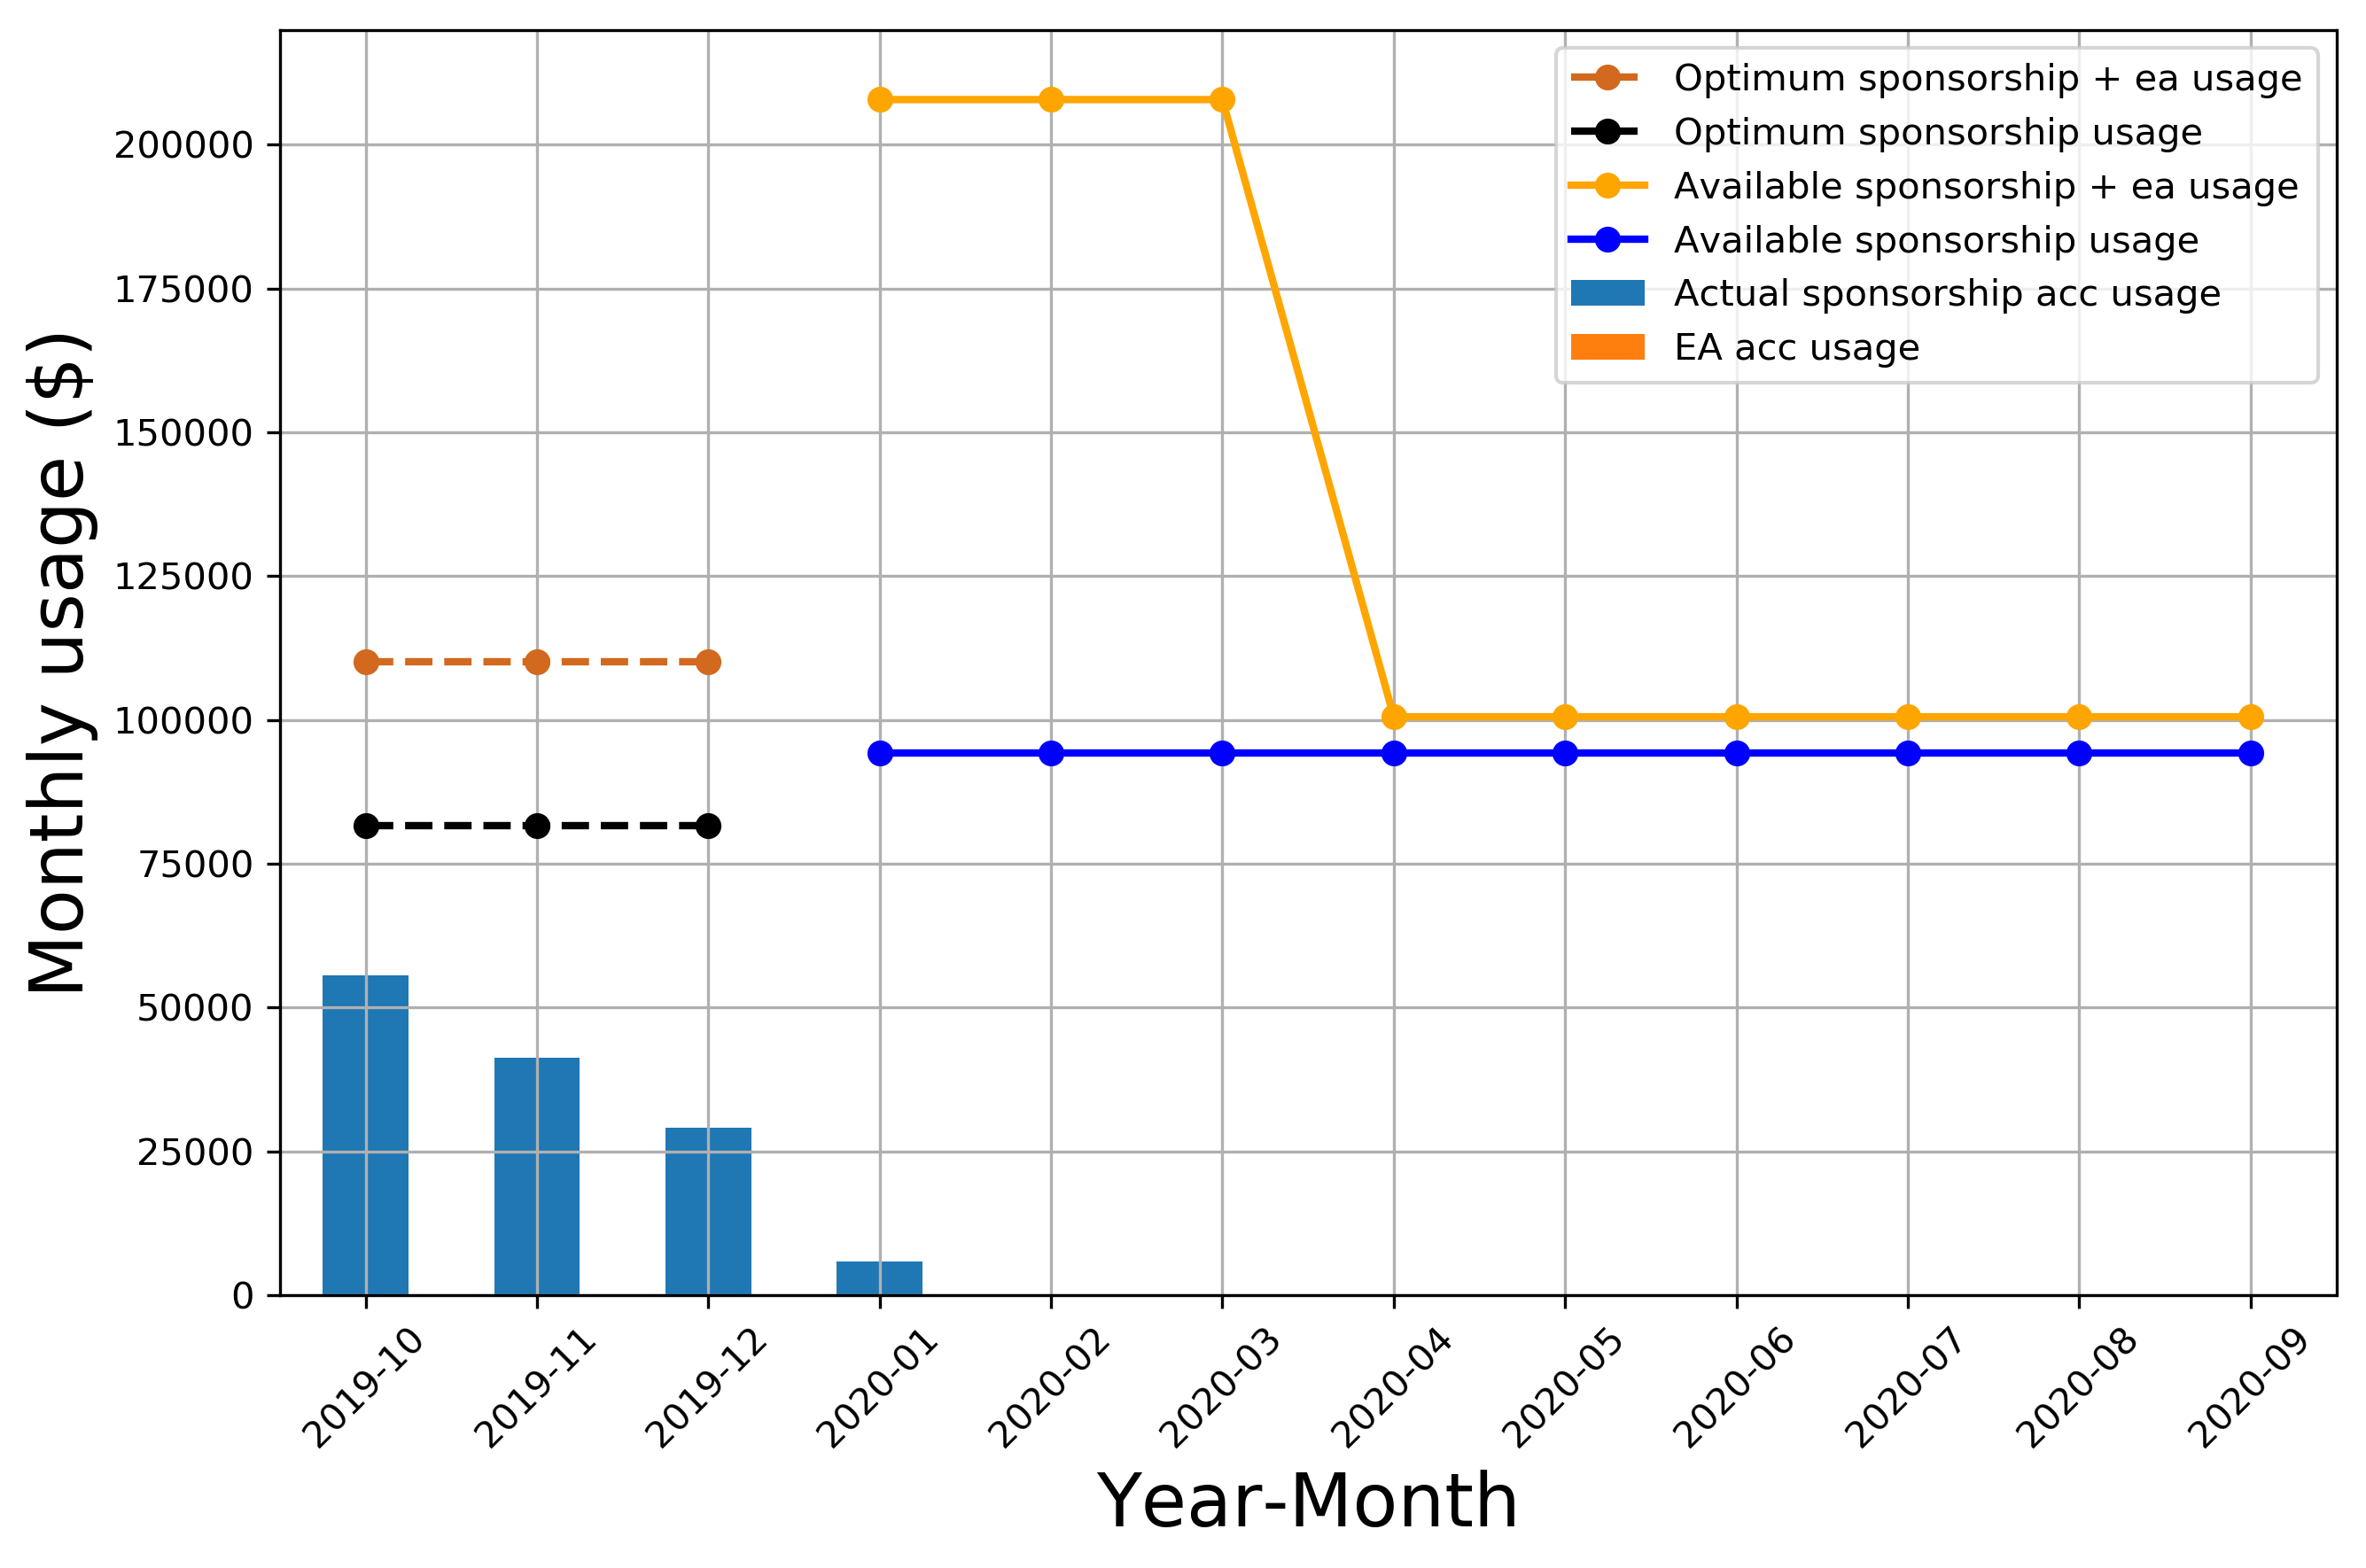

In [20]:
plot_year_month_bar_stacked_ext(spnsr_df, ea_df, ylim=220000)

In [11]:
print(detailed_text)

Detailed analysis of Microsoft Azure sponsorship usage for the period 01/10/2019 - 09/01/2020:


In [12]:
get_detailed_spnsr_analysis_df(spnsr_data_path, analysis_from, analysis_to)

['{3304DEF8-15AF-4DA2-8D4C-50A3BD9F5114}', '{EB9F30AA-04C9-4779-8B8A-2D08285142F2}', '{F484347F-982E-4553-8978-213F8AF3FD43}', '{47D02213-61A2-4113-9126-322C8876BE2F}', '{362F5084-5218-4B19-85C1-F7FF9E872046}', '{71E21E4C-4177-4CF1-AB25-6A88E52EDD03}', '{FB631FDE-18F2-45F4-B018-D622DC16D94E}', '{7D83CCB2-E88A-43B8-AF34-7E1D74BE3C40}', '{F2F151B9-2AF6-4E1D-9CD4-FB80E59D3BDF}', '{9259CB1C-EAA3-4301-889E-F8C9988A4AD3}', '{93077F61-2D19-480C-9994-4FAFDD6185D2}', '{2CD64292-4240-4274-98ED-FC86AB395280}', '{D2B3BB29-ADD7-44A1-8185-93C6155C7169}', '{4E8AC81B-220D-4B93-88E4-75F27A5D8AD1}', '{90B42CAC-AE2D-45C1-A8B1-B26839FF20F1}', '{0503155C-2BFE-4CDE-89EC-038EA288E79D}', '{E305A285-A056-4173-91DA-F7623E0A4524}', '{9C3DC1EE-CF80-4C32-95AB-8F32B0CEA40C}', '{813E99A0-5C7C-4C43-AFD3-2A9566880854}', '{BE6D41C8-4D43-4890-AF25-771D40272758}', '{AFE7C62F-CF25-44B3-9E56-D7A14A3EA5E4}', '{F871C3F7-6A68-42FB-BED6-81689E730F7A}', '{1BA6669A-274F-407C-96D7-53BE98300C5F}', '{95ACC417-CC03-47A5-8356-5746187

,Subscription,SubscriptionGuid,2019-10,2019-11,2019-12,2020-01,All
0,Total,All,"$55,657.26","$41,244.02","$29,101.02","$5,864.59","$131,866.89"
1,17 Subscriptions with 1000 to 5000 spent,3,"$17,162.18","$16,642.58","$9,458.48","$2,111.01","$45,374.25"
2,210 Subscriptions with 0 to 1000 spent,2,"$21,479.69","$10,079.72","$7,781.39","$2,305.14","$41,645.93"
3,Data Study Groups,1,"$15,606.75","$10,849.85","$11,861.15","$1,448.44","$39,766.19"
4,1 Subscriptions with 5000 to 10000 spent,4,"$1,408.64","$3,671.88",,,"$5,080.52"


In [13]:
print(detailed2_text)

Detailed analysis of Microsoft Azure sponsorship usage for the period 01/10/2019 - 09/01/2020:


In [14]:
get_detailed_spnsr_analysis_df(spnsr_data_path, detailed_analysis_from, analysis_to)

['{3304DEF8-15AF-4DA2-8D4C-50A3BD9F5114}', '{EB9F30AA-04C9-4779-8B8A-2D08285142F2}', '{F484347F-982E-4553-8978-213F8AF3FD43}', '{47D02213-61A2-4113-9126-322C8876BE2F}', '{362F5084-5218-4B19-85C1-F7FF9E872046}', '{71E21E4C-4177-4CF1-AB25-6A88E52EDD03}', '{FB631FDE-18F2-45F4-B018-D622DC16D94E}', '{7D83CCB2-E88A-43B8-AF34-7E1D74BE3C40}', '{F2F151B9-2AF6-4E1D-9CD4-FB80E59D3BDF}', '{9259CB1C-EAA3-4301-889E-F8C9988A4AD3}', '{93077F61-2D19-480C-9994-4FAFDD6185D2}', '{2CD64292-4240-4274-98ED-FC86AB395280}', '{D2B3BB29-ADD7-44A1-8185-93C6155C7169}', '{4E8AC81B-220D-4B93-88E4-75F27A5D8AD1}', '{90B42CAC-AE2D-45C1-A8B1-B26839FF20F1}', '{0503155C-2BFE-4CDE-89EC-038EA288E79D}', '{E305A285-A056-4173-91DA-F7623E0A4524}', '{9C3DC1EE-CF80-4C32-95AB-8F32B0CEA40C}', '{813E99A0-5C7C-4C43-AFD3-2A9566880854}', '{BE6D41C8-4D43-4890-AF25-771D40272758}', '{AFE7C62F-CF25-44B3-9E56-D7A14A3EA5E4}', '{F871C3F7-6A68-42FB-BED6-81689E730F7A}', '{1BA6669A-274F-407C-96D7-53BE98300C5F}', '{95ACC417-CC03-47A5-8356-5746187

,Subscription,SubscriptionGuid,2019-10,2019-11,2019-12,2020-01,All
0,Total,All,"$55,657.26","$41,244.02","$29,101.02","$5,864.59","$131,866.89"
1,17 Subscriptions with 1000 to 5000 spent,3,"$17,162.18","$16,642.58","$9,458.48","$2,111.01","$45,374.25"
2,210 Subscriptions with 0 to 1000 spent,2,"$21,479.69","$10,079.72","$7,781.39","$2,305.14","$41,645.93"
3,Data Study Groups,1,"$15,606.75","$10,849.85","$11,861.15","$1,448.44","$39,766.19"
4,1 Subscriptions with 5000 to 10000 spent,4,"$1,408.64","$3,671.88",,,"$5,080.52"


In [15]:
spnsr_remain + ea_remain

1226835.756595169